In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [4]:
insurance_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medical Insurance Cost Prediction/insurance.csv')

In [5]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Categorical Features
print(insurance_dataset['sex'].value_counts())
print(insurance_dataset['smoker'].value_counts())
print(insurance_dataset['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


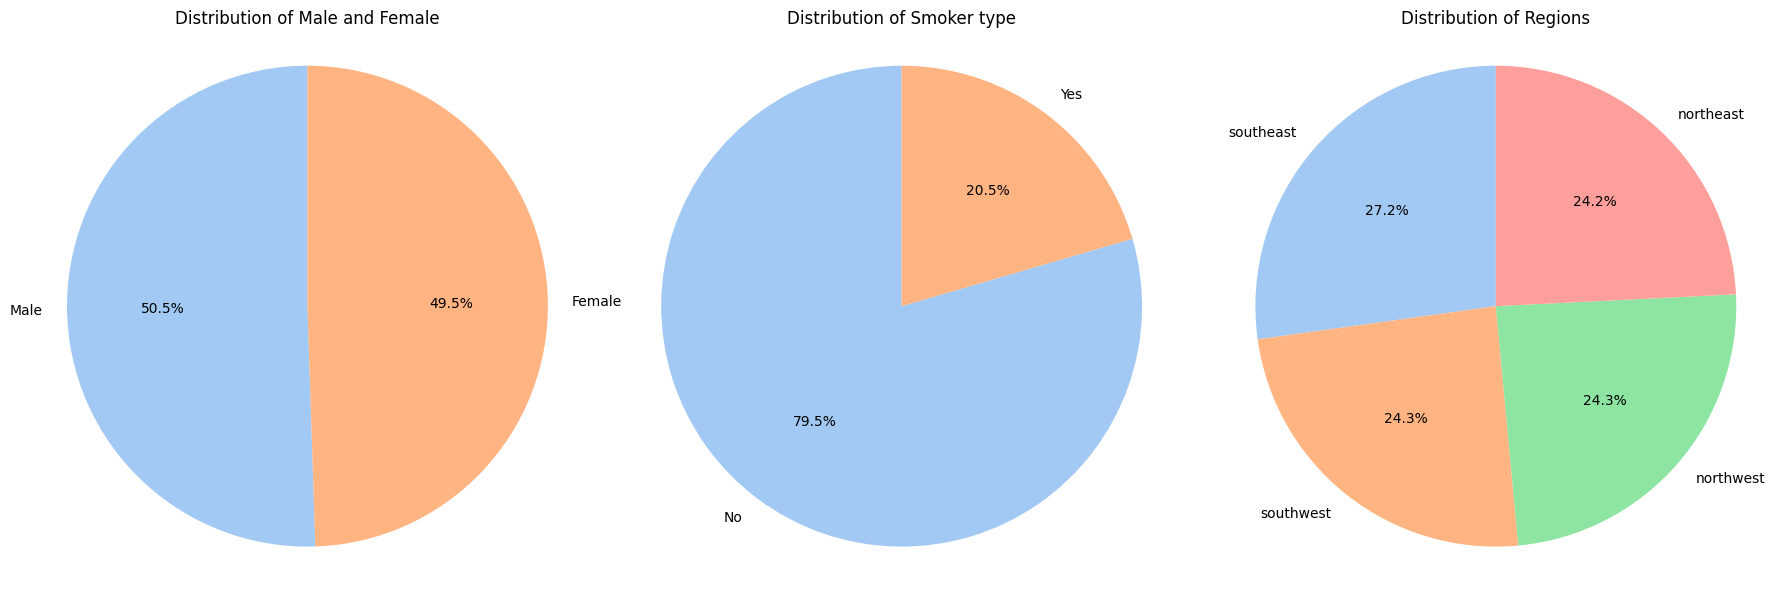

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Fuel_Type
sex_counts = insurance_dataset['sex'].value_counts()
axes[0].pie(sex_counts, labels=['Male', 'Female'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Distribution of Male and Female')

# Pie chart for Seller_Type
smoker_counts = insurance_dataset['smoker'].value_counts()
axes[1].pie(smoker_counts, labels=['No', 'Yes'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].axis('equal')
axes[1].set_title('Distribution of Smoker type')

# Pie chart for Transmission
region_counts = insurance_dataset['region'].value_counts()
axes[2].pie(region_counts, labels=['southeast', 'southwest','northwest','northeast'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[2].axis('equal')
axes[2].set_title('Distribution of Regions')

# Show the pie charts
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

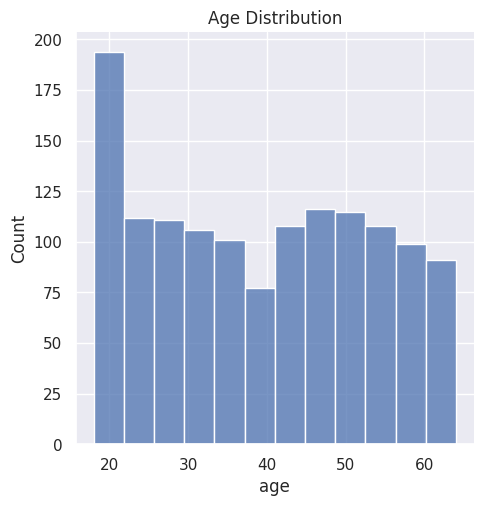

In [19]:
# Checking distribution of Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

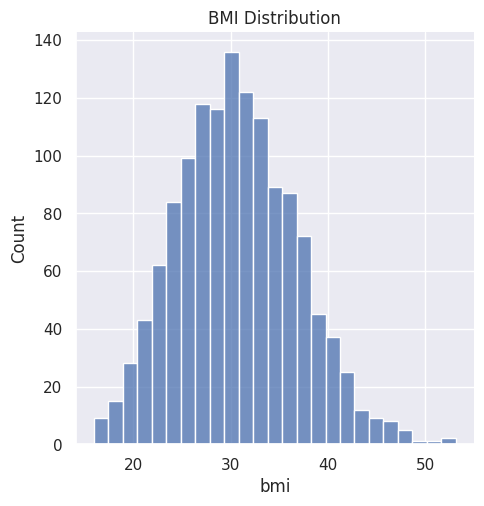

In [20]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()
# Normally Distributed
# Lot of people in this data set are over weight

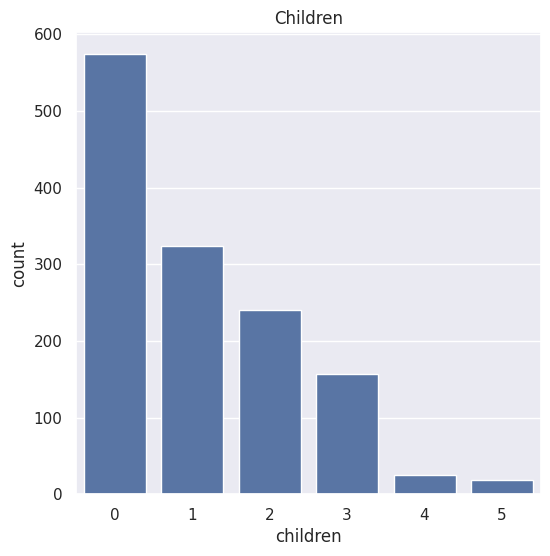

In [22]:
# Children's Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [24]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<Figure size 600x600 with 0 Axes>

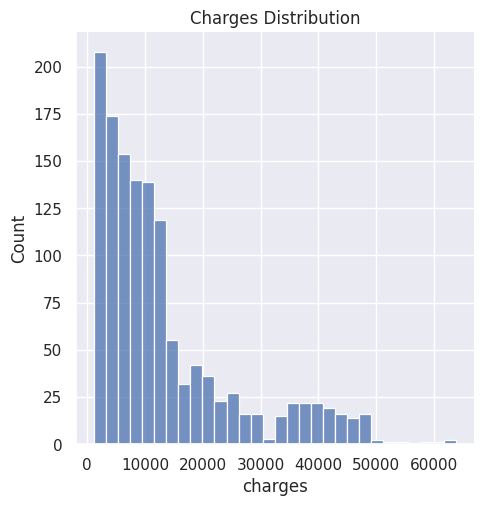

In [25]:
#Distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [26]:
# Data Pre-Processing
# Encoding categorical values to numerical values so they can be understood by computer

insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-26-3f49f11be468>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)
<ipython-input-26-3f49f11be468>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)
<ipython-input-26-3f49f11be468>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

In [27]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [28]:
# Splitting features and target
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [29]:
# Splitting dataset into train and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1204, 6) (134, 6)


In [37]:
model = LinearRegression()

In [38]:
# Training the model
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 8271.88952236  8247.19062161  7097.89239725 ... 17362.36900535
  9558.06392999 13858.46492715]


In [41]:
error_score = r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7533807289098102


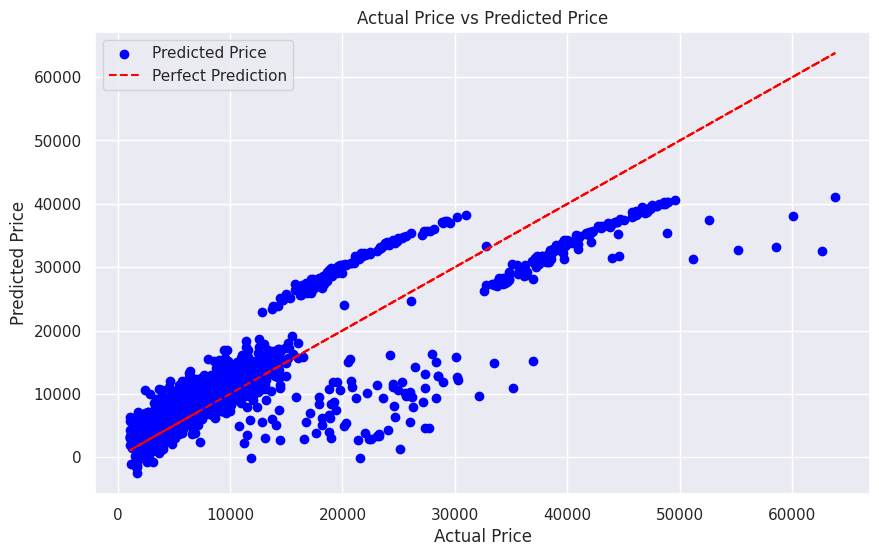

In [45]:
# Visualize actual and predicted prices with a line of equality
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue', label='Predicted Price')
plt.plot(Y_train, Y_train, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()

In [42]:
testing_data_prediction = model.predict(X_test)
print(testing_data_prediction)

[ 1449.78468052 11755.72412424  9827.31092144  2069.03169388
  7329.02747125 11448.71852974  3466.35127647   985.92089055
 12340.50915759  9755.8328887  11839.15175432  5170.89909003
 29828.29635377  -550.41022554 12623.52122424 12748.5432075
  3737.47665171  8084.46145993 29090.34561945  2744.22539159
 12754.05230634  2380.27586736 34112.33099684 31967.62689587
 30245.69531932  8692.840345    2145.64393653 14971.0216152
  6791.15708443  2366.91928286  9781.16391092  6100.40785008
  4333.1782706   4891.47877545  8753.72279336  5009.94052459
 30465.70396675  6703.17184726 27356.08363801 13633.6268507
   610.03621765 28549.18103101  8126.33228416  1702.47705137
 10411.95764891  8073.37851543 11222.49862326  8119.71573099
 10678.09116096 13754.68547495  5241.98455171  -907.08799724
 26867.25126456 37300.98087534  7408.12691903 18063.68716122
  1267.01589263 10751.98313808  2402.70228233 33995.09537192
 11278.38448093   612.41506386  4428.94928327 35762.54206673
 -1221.38274419 13916.68679

In [43]:
error_score = r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7064951721664847


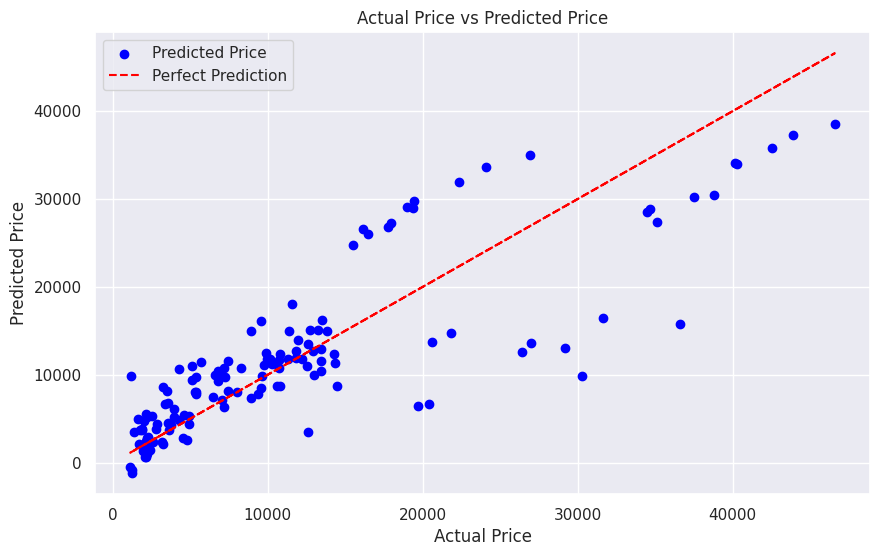

In [46]:
# Visualize actual and predicted prices with a line of equality
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction, color='blue', label='Predicted Price')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()

In [54]:
# Building a predicitve System
input_data = (31,0,25.74,0,0,0)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print("Insurance cost is UDS:",prediction[0])

Insurance cost is UDS: 3870.3519400745827


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
